COMP5930M Scientific Computation - Tutorial 4  \\
Newton's method and gradient descent with line search, homotopy continuation

Animplementation of the Newton method with line-search consists of:

1.   For $k=0,1,.\ldots$: Evaluate current value of $F(x_k)$.
2.   Evaluate the Jacobian matrix $J(x_k)$.
3.   Solve the tangent problem: $J \delta = -F$.
4.   Set $\lambda=1$ and compute $F(x_c) = F(x + \lambda x)$
5.   If $|F(x_c)| < |F(x)|$ we accept $\lambda$, otherwise set $\lambda \to \lambda / 2$ and try again.
4.   Update the iterate $x_{k+1} = x_k + \lambda \delta$.
5.   Repeat until one of the stopping criteria is reached.

In [59]:
import numpy as np
import copy
from numpy.linalg import norm

def myNewtonSysLS(fnon, jac, x0, tol, maxk, *fnonargs):
    # fnon     - name of the nonlinear function f(x)
    # jac      - name of the Jacobian function J(x)
    # x0       - initial guess for the solution x0
    # tol      - stopping tolerance for Newton's iteration
    # maxk     - maximum number of Newton iterations before stopping
    # fnonargs - optional arguments that will be passed to the nonlinear function (useful for additional function parameters)
    k = 0
    x = x0
    maxm = 5 # Maximum number of line-step iterations
    F = eval(fnon)(x,*fnonargs)

    print(' k    f(xk)')

    # Main Newton loop
    while (norm(F,2) > tol and k <= maxk):
        # Evaluate Jacobian matrix
        J = eval(jac)(x,2,fnon,F,*fnonargs)

        # Take Newton step with line-search iteration (Armijo)
        delta = np.linalg.solve(J,-F)

        # Line-search parameters
        lamb = 1
        Fc = copy.copy(F)
        m = 1

        while (norm(Fc,2) >= norm(F,2) and m < maxm):
          xc = x + lamb * delta
          Fc = eval(fnon)(xc,*fnonargs)
          print('  {0:2.2f}  {1:2.2e}'.format(lamb, norm(Fc,2)))
          lamb = lamb / 2
          m += 1

        F = Fc
        x = xc
        k += 1
        print('{0:2.0f}  {1:2.2e}'.format(k, norm(F,2)))

    if (k >= maxk):
        print('Not converged')
    else:
        print('Converged to ')
        print(x)

Let's recall the challenging test case from last time:

In [60]:
import numpy as np
import math

def example2(x):
    F = np.zeros((2,1), dtype=np.float64)
    F[0] = -2*x[0]**2 + 3*x[0]*x[1] + 4*math.sin(x[1]) - 6
    F[1] = 3*x[0]**2 - 2*x[0]*x[1]**2 + 3*math.cos(x[0]) + 4
    return F

def dExample2(x,n,fnon,F0,*fnonargs):
    J = np.zeros((2,2), dtype=np.float64)
    J[0,0] = -4*x[0] + 3*x[1]
    J[0,1] = 3*x[0] + 4*math.cos(x[1])
    J[1,0] = 6*x[0] - 2*x[1]**2 - 3*math.sin(x[0])
    J[1,1] = -4*x[0]*x[1]
    return J

The function has a complex landscape and convergence only occurs from initial points near to one of the solutions:

<a list of 7 text.Text objects>

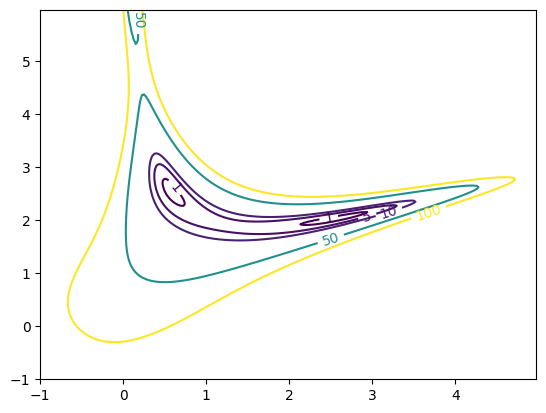

In [61]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

delta = 0.025
x = np.arange(-1.0, 5.0, delta)
y = np.arange(-1.0, 6.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = -2*X**2 + 3*X*Y + 4*np.sin(Y) - 6
Z2 = 3*X**2 - 2*X*Y**2 + 3*np.cos(X) + 4
Z = Z1**2 + Z2**2

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, np.array([1, 5, 10, 50, 100]))
ax.clabel(CS, inline=True, fontsize=10)

With line-search Newton now converges from all four different initial guesses:

In [62]:
import numpy as np
myNewtonSysLS("example2", "dExample2", np.array([[0.5],[3]]), 1e-6, 20)
myNewtonSysLS("example2", "dExample2", np.array([[2.5],[2]]), 1e-6, 20)
myNewtonSysLS("example2", "dExample2", np.array([[4],[1]]), 1e-6, 20)
myNewtonSysLS("example2", "dExample2", np.array([[0],[4]]), 1e-6, 20)

 k    f(xk)
  1.00  2.00e-01
 1  2.00e-01
  1.00  8.07e-03
 2  8.07e-03
  1.00  2.58e-06
 3  2.58e-06
  1.00  3.81e-13
 4  3.81e-13
Converged to 
[[0.57982909]
 [2.54620921]]
 k    f(xk)
  1.00  9.89e-03
 1  9.89e-03
  1.00  2.75e-05
 2  2.75e-05
  1.00  9.92e-11
 3  9.92e-11
Converged to 
[[2.59216492]
 [2.04115225]]
 k    f(xk)
  1.00  1.42e+01
 1  1.42e+01
  1.00  8.71e+00
 2  8.71e+00
  1.00  8.77e+03
  0.50  2.02e+03
  0.25  4.87e+02
  0.12  1.24e+02
 3  1.24e+02
  1.00  7.87e+01
 4  7.87e+01
  1.00  2.45e+01
 5  2.45e+01
  1.00  1.26e+01
 6  1.26e+01
  1.00  4.08e+01
  0.50  9.58e+00
 7  9.58e+00
  1.00  1.89e+01
  0.50  4.07e+00
 8  4.07e+00
  1.00  1.33e+01
  0.50  1.08e+01
  0.25  1.06e+01
  0.12  5.99e+00
 9  5.99e+00
  1.00  4.97e+00
10  4.97e+00
  1.00  7.04e+00
  0.50  4.26e+00
11  4.26e+00
  1.00  1.44e+01
  0.50  7.56e+00
  0.25  4.70e+00
  0.12  4.11e+00
12  4.11e+00
  1.00  8.97e-01
13  8.97e-01
  1.00  1.52e-01
14  1.52e-01
  1.00  1.11e-03
15  1.11e-03
  1.00  5.86e-

Next we implement the gradient descent -method with Armijo line-search included:

In [63]:
import numpy as np
import copy
import array
from numpy.linalg import norm

def myGradientDescentLS(fnon, jac, x0, tol, maxk, maxm, *fnonargs):
    # fnon     - name of the nonlinear function f(x)
    # jac      - name of the Jacobian function J(x)
    # x0       - initial guess for the solution x0
    # tol      - stopping tolerance for Newton's iteration
    # maxk     - maximum number of Newton iterations before stopping
    # fnonargs - optional arguments that will be passed to the nonlinear function (useful for additional function parameters)
    k = 0
    x = x0

    F = eval(fnon)(x,*fnonargs)

    print(' k    f(xk)')

    xArray = []

    # Main gradient descent loop
    while (norm(F,2) > tol and k <= maxk):
        # Evaluate Jacobian matrix
        J = eval(jac)(x,2,fnon,F,*fnonargs)

        # Take gradient descent step with line-search iteration (Armijo)
        delta = -2 * np.matmul(np.transpose(J), F)

        # Line-search parameters
        lamb = 0.01        # Initial step-size to avoid taking too many Armijo steps
        Fc = copy.copy(F)
        m = 1

        while (norm(Fc,2) >= norm(F,2) and m < maxm):
          xc = x + lamb * delta
          Fc = eval(fnon)(xc,*fnonargs)
          print('  {0:2.2f}  {1:2.2e}'.format(lamb, norm(Fc,2)))
          lamb = lamb / 2
          m += 1

        xArray.append(x)
        F = Fc
        x = xc
        k += 1
        print('{0:2.0f}  {1:2.2e}'.format(k, norm(F,2)))

    if (k >= maxk):
        print('Not converged')
    else:
        print('Converged to ')
        print(x)

        # Return the iterates as a Numpy array
        return(xArray)

The gradient descent -method also converges, but takes hundreds of iterations to do so:

In [64]:
import numpy as np
myGradientDescentLS("example2", "dExample2", np.array([[0.5],[3]]), 1e-6, 1000, 10);
myGradientDescentLS("example2", "dExample2", np.array([[2.5],[2]]), 1e-6, 1000, 10);
myGradientDescentLS("example2", "dExample2", np.array([[4],[1]]), 1e-6, 1000, 10);
myGradientDescentLS("example2", "dExample2", np.array([[0],[4]]), 1e-6, 1000, 10);

 k    f(xk)
  0.01  5.47e+00
  0.01  2.81e+00
  0.00  1.85e+00
 1  1.85e+00
  0.01  3.66e+00
  0.01  2.04e+00
  0.00  1.59e+00
 2  1.59e+00
  0.01  2.26e+00
  0.01  1.51e+00
 3  1.51e+00
  0.01  3.66e+00
  0.01  1.76e+00
  0.00  1.16e+00
 4  1.16e+00
  0.01  1.51e+00
  0.01  1.06e+00
 5  1.06e+00
  0.01  2.04e+00
  0.01  1.06e+00
  0.00  8.44e-01
 6  8.44e-01
  0.01  7.22e-01
 7  7.22e-01
  0.01  1.54e+00
  0.01  7.03e-01
 8  7.03e-01
  0.01  1.69e+00
  0.01  7.02e-01
 9  7.02e-01
  0.01  1.79e+00
  0.01  6.75e-01
10  6.75e-01
  0.01  1.76e+00
  0.01  6.51e-01
11  6.51e-01
  0.01  1.71e+00
  0.01  5.89e-01
12  5.89e-01
  0.01  1.54e+00
  0.01  5.37e-01
13  5.37e-01
  0.01  1.39e+00
  0.01  4.59e-01
14  4.59e-01
  0.01  1.19e+00
  0.01  3.98e-01
15  3.98e-01
  0.01  1.02e+00
  0.01  3.28e-01
16  3.28e-01
  0.01  8.33e-01
  0.01  2.74e-01
17  2.74e-01
  0.01  6.89e-01
  0.01  2.20e-01
18  2.20e-01
  0.01  5.51e-01
  0.01  1.80e-01
19  1.80e-01
  0.01  4.45e-01
  0.01  1.43e-01
20  1.43e-

We can plot the gradient descent iterations on top of the isocontour plot to understand what is going on with the slow convergence:

 k    f(xk)
  0.01  3.65e+01
  0.01  6.04e+01
  0.00  3.84e+01
  0.00  1.77e+01
  0.00  7.28e+00
 1  7.28e+00
  0.01  6.92e+01
  0.01  3.60e+01
  0.00  1.79e+01
  0.00  8.86e+00
  0.00  6.01e+00
 2  6.01e+00
  0.01  2.18e+01
  0.01  1.26e+01
  0.00  7.75e+00
  0.00  6.06e+00
  0.00  5.77e+00
 3  5.77e+00
  0.01  7.65e+00
  0.01  6.03e+00
  0.00  5.62e+00
 4  5.62e+00
  0.01  2.09e+01
  0.01  1.21e+01
  0.00  7.22e+00
  0.00  5.55e+00
 5  5.55e+00
  0.01  2.53e+01
  0.01  1.38e+01
  0.00  7.70e+00
  0.00  5.44e+00
 6  5.44e+00
  0.01  2.49e+01
  0.01  1.41e+01
  0.00  7.71e+00
  0.00  5.24e+00
 7  5.24e+00
  0.01  2.48e+01
  0.01  1.34e+01
  0.00  7.23e+00
  0.00  4.94e+00
 8  4.94e+00
  0.01  1.98e+01
  0.01  1.12e+01
  0.00  6.26e+00
  0.00  4.59e+00
 9  4.59e+00
  0.01  1.55e+01
  0.01  8.59e+00
  0.00  5.21e+00
  0.00  4.25e+00
10  4.25e+00
  0.01  9.87e+00
  0.01  5.98e+00
  0.00  4.31e+00
  0.00  3.98e+00
11  3.98e+00
  0.01  6.17e+00
  0.01  4.26e+00
  0.00  3.75e+00
12  3.75e+00

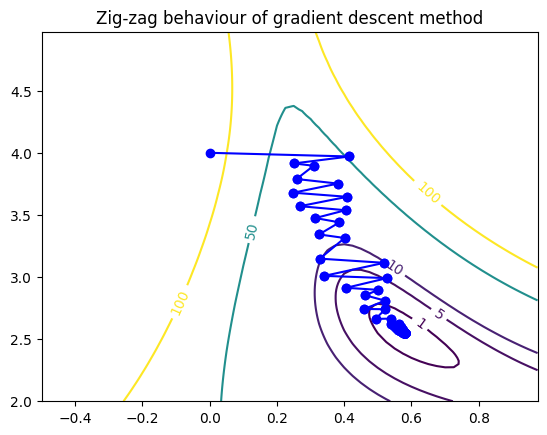

In [65]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

xArray = myGradientDescentLS("example2", "dExample2", np.array([[0],[4]]), 1e-6, 1000, 10);

delta = 0.025
x = np.arange(-0.5, 1.0, delta)
y = np.arange(2.0, 5.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = -2*X**2 + 3*X*Y + 4*np.sin(Y) - 6
Z2 = 3*X**2 - 2*X*Y**2 + 3*np.cos(X) + 4
Z = Z1**2 + Z2**2

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, np.array([1, 5, 10, 50, 100]))
ax.clabel(CS, inline=True, fontsize=10)
ax.set_title('Zig-zag behaviour of gradient descent method')

for k in range(0,len(xArray)-1):
    x = xArray[k]
    xn = xArray[k+1]
    ax.plot([x[0],xn[0]],[x[1],xn[1]],'bo-')



In [66]:
import numpy as np
import copy
from numpy.linalg import norm

def homotopyContinuation(fnon, jac, x0, nt, *fnonargs):
    # fnon     - name of the nonlinear function f(x)
    # jac      - name of the Jacobian function J(x)
    # x0       - initial guess for the solution x0
    # nt       - number of homotopy continuation steps
    # fnonargs - optional arguments that will be passed to the nonlinear function (useful for additional function parameters)
    k = 0
    x = x0

    F0 = eval(fnon)(x0,*fnonargs)
    F = F0
    dt = 1/nt

    print(' k    f(xk)')

    # Main Newton loop
    for k in range(0,nt):
        # Evaluate Jacobian matrix
        J = eval(jac)(x,2,fnon,F,*fnonargs)

        # Take Newton step with line-search iteration (Armijo)
        delta = np.linalg.solve(J,-F0)

        x = x + dt * delta
        F  = eval(fnon)(x,*fnonargs)
        print('{0:2.0f}  {1:2.2e}'.format(k+1, norm(F,2)))

    return(x)

To test the homotopy continuation method, we start with 10 continuation steps and then switch to Newton (with or without line-search):

In [67]:
import numpy as np
print("Initialisation with 10 homotopy continuation steps:")
x0 = homotopyContinuation("example2", "dExample2", np.array([[0],[4]]), 10)
print("Final convergence with line-search Newton:")
myNewtonSysLS("example2", "dExample2", x0, 1e-6, 20)

Initialisation with 10 homotopy continuation steps:
 k    f(xk)
 1  1.03e+01
 2  9.17e+00
 3  8.07e+00
 4  6.98e+00
 5  5.90e+00
 6  4.84e+00
 7  3.79e+00
 8  2.76e+00
 9  1.77e+00
10  9.06e-01
Final convergence with line-search Newton:
 k    f(xk)
  1.00  3.16e-02
 1  3.16e-02
  1.00  4.77e-05
 2  4.77e-05
  1.00  1.07e-10
 3  1.07e-10
Converged to 
[[0.57982909]
 [2.54620921]]
